In [36]:
from konlpy.tag import Okt
class BayesianFilter:
    def __init__(self): # self: 만들어질 객체
        self.words = set() # 집합 - 중복 배제
        self.word_dict = {} # 카테고리(광고/ 중요) 단어 빈도수
        self.category_dict = {}
    def split(self, text):
        '''
        okt를 이용하여 형태소로 분석 - 어미/ 조사/ 구두점 제외
        '''
        result = []
        okt = Okt()
        malist = okt.pos(text, norm=True, stem=True)
        for word in malist: # word: (형태소, 품사)
            if word[1] not in ["Josa", "Eomi", "Punctuation"]:
                result.append(word[0])
        return result
    
    def inc_word(self, word, category):
        '''
        단어를 카테고리에 추가
        '''
        if not category in self.word_dict:
            self.word_dict[category] = {} # {"광고": {}}
        if not word in self.word_dict[category]:
            self.word_dict[category][word] = 0 # {"광고": { "파격": 0}}
        self.word_dict[category][word] += 1 # {"광고": { "파격": 1}}
        self.words.add(word) # {"파격"}
        
    def inc_category(self, category):
        if not category in self.category_dict:
            self.category_dict[category] = 0
        self.category_dict[category] += 1
    
    def category_prob(self, category):
        '''
        카테고리일 확률 계산
        '''
        return self.category_dict[category]/sum(self.category_dict.values())
        
    def get_word_cnt(self, word, category):
        '''
        카테고리 내부의 word 빈도수 반환
        '''
        if word in self.word_dict[category].keys():
            return self.word_dict[category][word]
        else:
            return 0
        
    def word_prob(self, word, category, len_words):
        '''
        카테고리 내부의 단어 출현 확률 계산
        '''
        # 카테고리 내의 word 빈도수 
        cnt = self.get_word_cnt(word, category) + 1
        # 카테고리에 속하는 단어의 전체 빈도수
        tot_cnt = sum(self.word_dict[category].values()) + len_words
        return cnt / tot_cnt
    
    def score(self, words, category):
        score = self.category_prob(category)
        for word in words:
            score *= self.word_prob(word, category, len(words))
        return score
    
    # 예측
    def predict(self, text):
        print(self.word_dict)
        print(self.category_dict)
        input_word_list = self.split(text) 
        score_list = []

        for category in self.category_dict.keys():
            score = self.score(input_word_list, category)
            score_list.append((category, score))
        score_list.sort(key=lambda x:x[1], reverse=True)
        res = scorelist[0][0]
        return res, scorelist
        
    def fit(self, text, category):
        word_list = self.split(text)
        for word in word_list:
            self.inc_word(word, category)
        self.inc_category(category)

In [37]:
bf = BayesianFilter()
bf.fit("파격 세일 - 오늘까지만 50% 할인", "광고")
bf.fit("쿠폰 선물 & 무료 배송", "광고")
bf.fit("현데계 백화점 세일", "광고")
bf.fit("봄과 함께 찾아온 따뜻한 신제품 소식", "광고")
bf.fit("인기 제품 기간 한정 세일", "광고")
bf.fit("오늘 일정 확인", "중요")
bf.fit("프로젝트 진행 상황 보고","중요")
bf.fit("계약 잘 부탁드립니다","중요")
bf.fit("회의 일정이 등록되었습니다.","중요")
bf.fit("오늘 일정이 없습니다.","중요")
res, scorelist = bf.predict("재고 정리 할인, 무료 배송")
print("결과: ", res, scorelist) # 중요 or 광고

{'광고': {'파격': 1, '세': 3, '일': 3, '오늘': 1, '50%': 1, '할인': 1, '쿠폰': 1, '선물': 1, '무료': 1, '배송': 1, '현': 1, '데': 1, '계': 1, '백화점': 1, '봄': 1, '함께': 1, '찾아오다': 1, '따뜻하다': 1, '신제품': 1, '소식': 1, '인기': 1, '제품': 1, '기간': 1, '한정': 1}, '중요': {'오늘': 2, '일정': 3, '확인': 1, '프로젝트': 1, '진행': 1, '상황': 1, '보고': 1, '계약': 1, '자다': 1, '부탁드리다': 1, '회의': 1, '등록': 1, '되어다': 1, '없다': 1}}
{'광고': 5, '중요': 5}
결과:  광고 [('광고', 0.0001953125), ('중요', 2.776620852422601e-05)]


# Keras 선형회귀, 로지스틱 회귀, 소프트 맥스

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np

In [30]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # 공부 시간
y = np.array([12, 23, 34, 45, 56, 77, 88, 100, 90]) # 점수
# 7.5 시간 공부하면 점수는 몇 점일까?

In [35]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation="linear"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"]) 
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

W0812 16:03:59.102009 36416 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0812 16:03:59.112972 36416 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/300
9/9 [==============================] - 0s 25ms/step - loss: 536.3785 - mean_squared_error: 536.3785
Epoch 2/300
9/9 [==============================] - 0s 886us/step - loss: 94.2972 - mean_squared_error: 94.2972
Epoch 3/300
9/9 [==============================] - 0s 776us/step - loss: 93.7838 - mean_squared_error: 93.7838
Epoch 4/300
9/9 [==============================] - 0s 887us/step - loss: 93.3490 - mean_squared_error: 93.3490
Epoch 5/300
9/9 [==============================] - 0s 776us/step - loss: 92.9865 - mean_squared_error: 92.9865
Epoch 6/300
9/9 [==============================] - 0s 887us/step - loss: 92.6899 - mean_squared_error: 92.6899
Epoch 7/300
9/9 [==============================] - 0s 776us/step - loss: 92.4537 - mean_squared_error: 92.4537
Epoch 8/300
9/9 [==============================] - 0s 999us/step - loss: 92.2727 - mean_squared_error: 92.2727
Epoch 9/300
9/9 [==============================] - 0s 776us/step - loss: 92.1419 - mean_squared_error: 92.1419


9/9 [==============================] - 0s 886us/step - loss: 107.3194 - mean_squared_error: 107.3194
Epoch 145/300
9/9 [==============================] - 0s 775us/step - loss: 107.3316 - mean_squared_error: 107.3316
Epoch 146/300
9/9 [==============================] - 0s 887us/step - loss: 107.3433 - mean_squared_error: 107.3433
Epoch 147/300
9/9 [==============================] - 0s 886us/step - loss: 107.3547 - mean_squared_error: 107.3547
Epoch 148/300
9/9 [==============================] - 0s 776us/step - loss: 107.3657 - mean_squared_error: 107.3657
Epoch 149/300
9/9 [==============================] - 0s 997us/step - loss: 107.3763 - mean_squared_error: 107.3763
Epoch 150/300
9/9 [==============================] - 0s 887us/step - loss: 107.3866 - mean_squared_error: 107.3866
Epoch 151/300
9/9 [==============================] - 0s 776us/step - loss: 107.3966 - mean_squared_error: 107.3966
Epoch 152/300
9/9 [==============================] - 0s 887us/step - loss: 107.4062 - mean_squ

9/9 [==============================] - 0s 776us/step - loss: 107.6867 - mean_squared_error: 107.6867
Epoch 285/300
9/9 [==============================] - ETA: 0s - loss: 98.7018 - mean_squared_error: 98.70 - 0s 665us/step - loss: 107.6868 - mean_squared_error: 107.6868
Epoch 286/300
9/9 [==============================] - 0s 777us/step - loss: 107.6869 - mean_squared_error: 107.6869
Epoch 287/300
9/9 [==============================] - 0s 887us/step - loss: 107.6870 - mean_squared_error: 107.6870
Epoch 288/300
9/9 [==============================] - 0s 776us/step - loss: 107.6871 - mean_squared_error: 107.6871
Epoch 289/300
9/9 [==============================] - 0s 887us/step - loss: 107.6872 - mean_squared_error: 107.6872
Epoch 290/300
9/9 [==============================] - 0s 665us/step - loss: 107.6874 - mean_squared_error: 107.6874
Epoch 291/300
9/9 [==============================] - 0s 665us/step - loss: 107.6874 - mean_squared_error: 107.6874
Epoch 292/300
9/9 [=====================

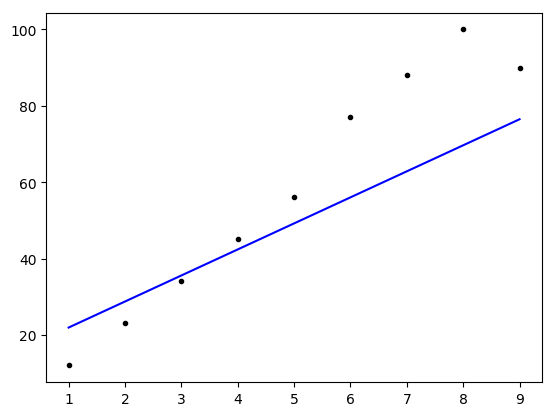

In [40]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.plot(x, model.predict(x), "b", x, y, "k.")

In [42]:
print(model.predict([7.5]))

[[66.25939]]


## 로지스틱 회귀

In [44]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9]) # 공부 시간
y = np.array([0, 0, 0, 0,0, 0, 1, 1, 1]) # 합격여부
model = Sequential()
model.add(Dense(1, input_dim=1, activation="sigmoid"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="binary_crossentropy", metrics=["binary_accuracy"]) 
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

W0812 16:24:24.010363 36416 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/300
9/9 [==============================] - 0s 27ms/step - loss: 2.0232 - binary_accuracy: 0.6667
Epoch 2/300
9/9 [==============================] - 0s 997us/step - loss: 1.4833 - binary_accuracy: 0.6667
Epoch 3/300
9/9 [==============================] - 0s 887us/step - loss: 1.0526 - binary_accuracy: 0.6667
Epoch 4/300
9/9 [==============================] - 0s 997us/step - loss: 0.8097 - binary_accuracy: 0.6667
Epoch 5/300
9/9 [==============================] - 0s 887us/step - loss: 0.7352 - binary_accuracy: 0.5556
Epoch 6/300
9/9 [==============================] - 0s 886us/step - loss: 0.7249 - binary_accuracy: 0.4444
Epoch 7/300
9/9 [==============================] - 0s 888us/step - loss: 0.7253 - binary_accuracy: 0.2222
Epoch 8/300
9/9 [==============================] - 0s 996us/step - loss: 0.7250 - binary_accuracy: 0.2222
Epoch 9/300
9/9 [==============================] - 0s 1ms/step - loss: 0.7233 - binary_accuracy: 0.3333
Epoch 10/300
9/9 [==============================]

9/9 [==============================] - 0s 776us/step - loss: 0.4398 - binary_accuracy: 1.0000
Epoch 153/300
9/9 [==============================] - 0s 887us/step - loss: 0.4387 - binary_accuracy: 1.0000
Epoch 154/300
9/9 [==============================] - 0s 776us/step - loss: 0.4377 - binary_accuracy: 1.0000
Epoch 155/300
9/9 [==============================] - 0s 776us/step - loss: 0.4366 - binary_accuracy: 1.0000
Epoch 156/300
9/9 [==============================] - 0s 886us/step - loss: 0.4356 - binary_accuracy: 1.0000
Epoch 157/300
9/9 [==============================] - 0s 998us/step - loss: 0.4345 - binary_accuracy: 1.0000
Epoch 158/300
9/9 [==============================] - 0s 887us/step - loss: 0.4335 - binary_accuracy: 1.0000
Epoch 159/300
9/9 [==============================] - 0s 997us/step - loss: 0.4325 - binary_accuracy: 1.0000
Epoch 160/300
9/9 [==============================] - 0s 997us/step - loss: 0.4315 - binary_accuracy: 1.0000
Epoch 161/300
9/9 [=======================

9/9 [==============================] - 0s 887us/step - loss: 0.3754 - binary_accuracy: 1.0000
Epoch 229/300
9/9 [==============================] - 0s 775us/step - loss: 0.3748 - binary_accuracy: 1.0000
Epoch 230/300
9/9 [==============================] - 0s 776us/step - loss: 0.3741 - binary_accuracy: 1.0000
Epoch 231/300
9/9 [==============================] - 0s 886us/step - loss: 0.3734 - binary_accuracy: 1.0000
Epoch 232/300
9/9 [==============================] - 0s 776us/step - loss: 0.3728 - binary_accuracy: 1.0000
Epoch 233/300
9/9 [==============================] - 0s 885us/step - loss: 0.3721 - binary_accuracy: 1.0000
Epoch 234/300
9/9 [==============================] - 0s 886us/step - loss: 0.3715 - binary_accuracy: 1.0000
Epoch 235/300
9/9 [==============================] - 0s 776us/step - loss: 0.3708 - binary_accuracy: 1.0000
Epoch 236/300
9/9 [==============================] - 0s 776us/step - loss: 0.3702 - binary_accuracy: 1.0000
Epoch 237/300
9/9 [=======================

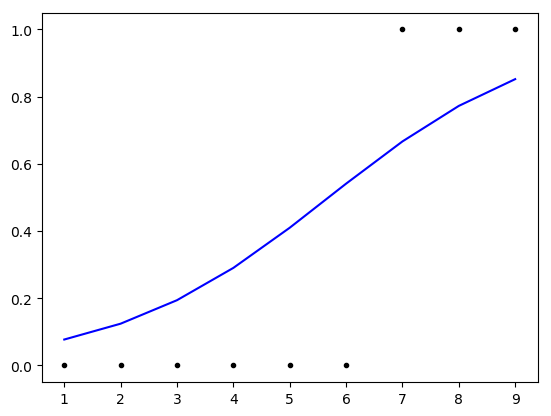

In [45]:
plt.plot(x, model.predict(x), "b", x, y, "k.")

In [47]:
model.predict([15, 17, 0.5, 1.5])

array([[0.9927982 ],
       [0.9974884 ],
       [0.06036613],
       [0.09832203]], dtype=float32)

In [50]:
# hx = w1x1 + w2x2 + w3x3 + b
x = np.array([[100, 90, 80], [55, 45, 36], [77, 88, 90]]) # 중간, 기말, 최종 점수
y = np.array([92, 70, 88]) # 점수
model = Sequential()
model.add(Dense(1, input_dim=3, activation="linear"))
sgd = optimizers.SGD(lr=0.000001)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"]) 
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
3/3 [==============================] - 0s 49ms/step - loss: 157.3678 - mean_squared_error: 157.3678
Epoch 2/300
3/3 [==============================] - 0s 1ms/step - loss: 157.0380 - mean_squared_error: 157.0380
Epoch 3/300
3/3 [==============================] - 0s 2ms/step - loss: 156.7574 - mean_squared_error: 156.7574
Epoch 4/300
3/3 [==============================] - 0s 997us/step - loss: 156.5170 - mean_squared_error: 156.5170
Epoch 5/300
3/3 [==============================] - 0s 998us/step - loss: 156.3092 - mean_squared_error: 156.3092
Epoch 6/300
3/3 [==============================] - 0s 2ms/step - loss: 156.1280 - mean_squared_error: 156.1280
Epoch 7/300
3/3 [==============================] - 0s 2ms/step - loss: 155.9686 - mean_squared_error: 155.9686
Epoch 8/300
3/3 [==============================] - 0s 997us/step - loss: 155.8269 - mean_squared_error: 155.8269
Epoch 9/300
3/3 [==============================] - 0s 1ms/step - loss: 155.6994 - mean_squared_error: 155

3/3 [==============================] - 0s 2ms/step - loss: 147.9875 - mean_squared_error: 147.9875
Epoch 146/300
3/3 [==============================] - 0s 1ms/step - loss: 147.9392 - mean_squared_error: 147.9392
Epoch 147/300
3/3 [==============================] - 0s 998us/step - loss: 147.8911 - mean_squared_error: 147.8911
Epoch 148/300
3/3 [==============================] - 0s 2ms/step - loss: 147.8429 - mean_squared_error: 147.8429
Epoch 149/300
3/3 [==============================] - 0s 998us/step - loss: 147.7949 - mean_squared_error: 147.7949
Epoch 150/300
3/3 [==============================] - 0s 998us/step - loss: 147.7470 - mean_squared_error: 147.7470
Epoch 151/300
3/3 [==============================] - 0s 997us/step - loss: 147.6991 - mean_squared_error: 147.6991
Epoch 152/300
3/3 [==============================] - 0s 1ms/step - loss: 147.6513 - mean_squared_error: 147.6513
Epoch 153/300
3/3 [==============================] - 0s 995us/step - loss: 147.6035 - mean_squared_err

3/3 [==============================] - 0s 1ms/step - loss: 141.7998 - mean_squared_error: 141.7998
Epoch 290/300
3/3 [==============================] - 0s 2ms/step - loss: 141.7619 - mean_squared_error: 141.7619
Epoch 291/300
3/3 [==============================] - 0s 1ms/step - loss: 141.7239 - mean_squared_error: 141.7239
Epoch 292/300
3/3 [==============================] - 0s 1ms/step - loss: 141.6860 - mean_squared_error: 141.6860
Epoch 293/300
3/3 [==============================] - 0s 1ms/step - loss: 141.6483 - mean_squared_error: 141.6483
Epoch 294/300
3/3 [==============================] - 0s 998us/step - loss: 141.6105 - mean_squared_error: 141.6105
Epoch 295/300
3/3 [==============================] - 0s 997us/step - loss: 141.5728 - mean_squared_error: 141.5728
Epoch 296/300
3/3 [==============================] - 0s 1ms/step - loss: 141.5352 - mean_squared_error: 141.5352
Epoch 297/300
3/3 [==============================] - 0s 1ms/step - loss: 141.4976 - mean_squared_error: 14

In [51]:
model.predict([x])

array([[99.605774],
       [51.171566],
       [90.04052 ]], dtype=float32)

## 다중 로지스틱 회귀

In [53]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]) 
y = np.array([0, 1, 1, 1]) 
model = Sequential()
model.add(Dense(1, input_dim=2, activation="linear"))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss="mse", metrics=["mse"]) 
model.fit(x, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
4/4 [==============================] - 0s 35ms/step - loss: 2.4904 - mean_squared_error: 2.4904   
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 2.0049 - mean_squared_error: 2.0049
Epoch 3/300
4/4 [==============================] - 0s 997us/step - loss: 1.6287 - mean_squared_error: 1.6287
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 1.3368 - mean_squared_error: 1.3368
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 1.1098 - mean_squared_error: 1.1098
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.9329 - mean_squared_error: 0.9329
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7947 - mean_squared_error: 0.7947
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.6862 - mean_squared_error: 0.6862
Epoch 9/300
4/4 [==============================] - 0s 997us/step - loss: 0.6008 - mean_squared_error: 0.6008
Epoch 10/300
4/4 [===========

4/4 [==============================] - 0s 748us/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 151/300
4/4 [==============================] - 0s 998us/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 152/300
4/4 [==============================] - 0s 997us/step - loss: 0.0690 - mean_squared_error: 0.0690
Epoch 153/300
4/4 [==============================] - 0s 997us/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 154/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 155/300
4/4 [==============================] - 0s 998us/step - loss: 0.0687 - mean_squared_error: 0.0687
Epoch 156/300
4/4 [==============================] - 0s 994us/step - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 157/300
4/4 [==============================] - 0s 997us/step - loss: 0.0686 - mean_squared_error: 0.0686
Epoch 158/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 159/300
4/4 [

4/4 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 298/300
4/4 [==============================] - 0s 997us/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 299/300
4/4 [==============================] - 0s 997us/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 300/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652


In [54]:
model.predict(x)

array([[0.26941207],
       [0.7510778 ],
       [0.7488847 ],
       [1.2305504 ]], dtype=float32)